**This project is regarding chun in Telecom. Various ML algorithm will be used to check the accuracy of the model.**

**Import the packages needed for this project. Since colab is used , get the authentication from gmail and reac the file**.

In [0]:
!pip install -U -q PyDrive

In [0]:
import sqlite3
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.metrics import mean_squared_errorTs_val_score

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
import keras
import psutil
import pandas as pd
import tensorflow as tf
from google.colab import auth
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file1 = drive.CreateFile({'id':'1ug6vOJoyjuxmnTLhC5DI89WNkIBpBK2h'})
file1.GetContentFile('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [0]:
!ls

adc.json  sample_data  WA_Fn-UseC_-Telco-Customer-Churn.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the csv and print few lines**

In [0]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')

In [0]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Get the shape of the dataframe**

In [0]:
df.shape

(7043, 20)

**Get the information of all the columns present in the data frame, including the data type and whether they are null or non null columns**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


**Display the columns which are of object  data type**

In [0]:
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**Check if any column has missing values**

**In Total charges column  remove the space and will the nan values with the mean of the column and convert it into number data type**

In [0]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [0]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [0]:
len(df[df['TotalCharges'].isna()])

0

In [0]:
df["TotalCharges"].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

In [0]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)

In [0]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [0]:
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

**Seperate Categorical and cumeric columns**

In [0]:
df_categorical = df.select_dtypes(include=object)
column_categorical = df_categorical.columns
df_numerical = df.select_dtypes(include=np.float)

column_numerical = df_numerical.columns

**Show the columns as histogram for columns which are of data type object and which are not**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


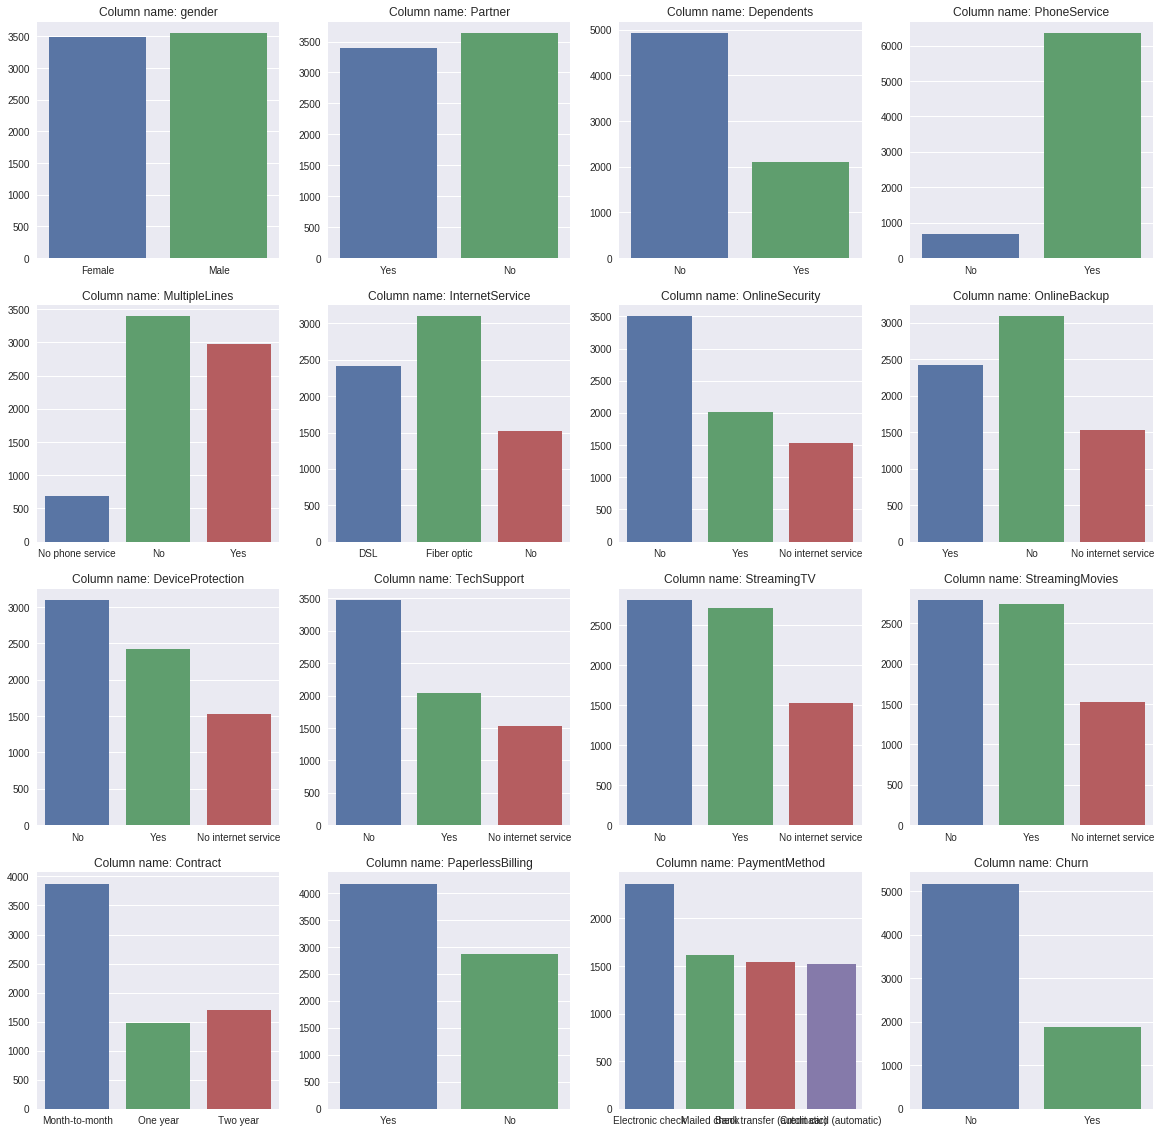

In [0]:
def display_plot(df, col_to_exclude, object_mode = True):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)
                
                
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col]) 
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])


            
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
    plt.show();
    return None
display_plot(df, 'customerid', object_mode = True)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


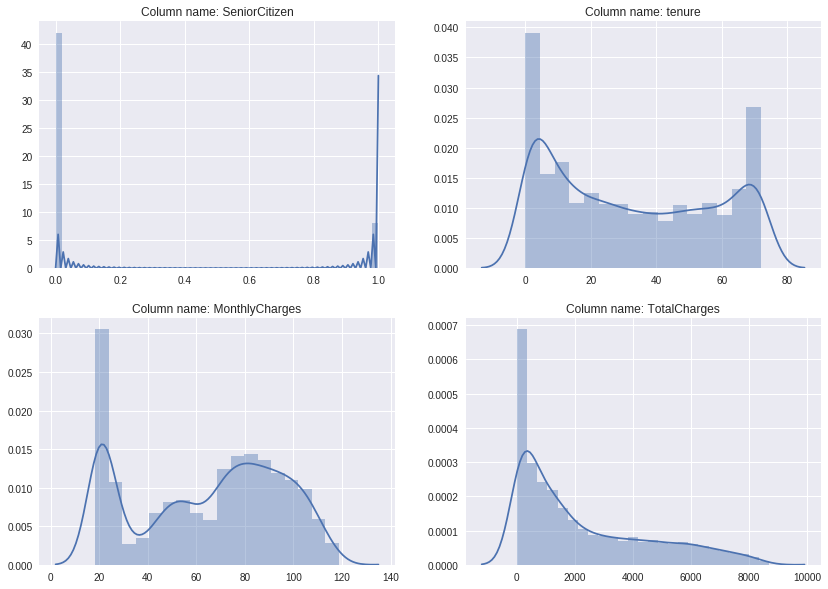

In [0]:
display_plot(df, 'customerid', object_mode = False)

**Get the relationship between Phone Serice and Multiplelines using crosstab**

In [0]:
	pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


**Get the relationship between Internet Service and Streaming TV using cross tab**

In [0]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


**Create a function to make the column values as 'NO' for columns which  apart from NO  has some extra string **

In [0]:
def convert_no_service (df):
    col_to_transform = []
    for col in df.columns:
        if (df[col].dtype == 'O') & (col != 'customerid'):
            if len(df[df[col].str.contains("No")][col].unique()) > 1:
                col_to_transform.append(col)
    
    print("Total column(s) to transform: {}".format(col_to_transform))
    for col in col_to_transform:
        df.loc[df[col].str.contains("No"), col] = 'No'
        
    return df

In [0]:
df = convert_no_service(df)

Total column(s) to transform: ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


**Get the gender wise graph of people who has left/not left**

In [0]:
print(pd.crosstab(df.gender,df.Churn,margins=True))

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


Percent of Females that Left the Company 50.24077046548957
Percent of Males that Left the Company 49.75922953451043


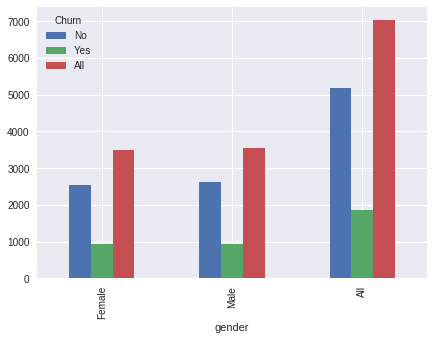

In [0]:
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Females that Left the Company {0}'.format((939/1869)*100))
print('Percent of Males that Left the Company {0}'.format((930/1869)*100))

In [0]:
print(pd.crosstab(df.Contract,df.Churn,margins=True))

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


**Get the graph contract wise who has left/not left**

Percent of Month-to-Month Contract People that Left the Company 88.55002675227395
Percent of One-Year Contract People that Left the Company 8.881754949170679
Percent of Two-Year Contract People that Left the Company 2.568218298555377


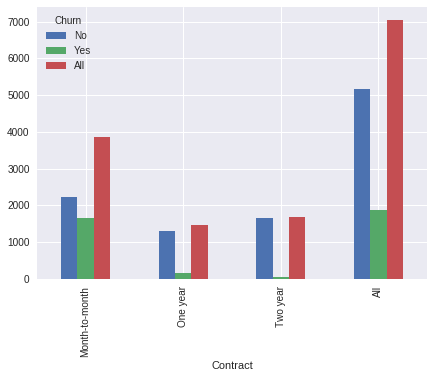

In [0]:
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655/1869)*100))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166/1869)*100)) 
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48/1869)*100))

**Display the graph based on internet services how many people has left/not left**

In [0]:
# Internet Service Vs Churn
print(pd.crosstab(df.InternetService,df.Churn,margins=True))

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


Percent of DSL Internet-Service People that Left the Company 24.558587479935795
Percent of Fiber Optic Internet-Service People that Left the Company 69.39539860888175
Percent of No Internet-Service People that Left the Company 6.046013911182451


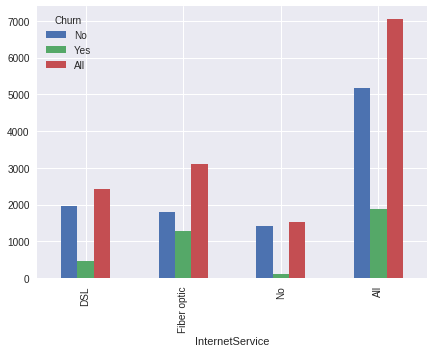

In [0]:
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar',figsize=(7,5));

print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459/1869)*100))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((1297/1869)*100)) 
print('Percent of No Internet-Service People that Left the Company {0}'.format((113/1869)*100))

**Show the graph between Partner and Dependent**

In [0]:
# Partner Vs Dependents
print(pd.crosstab(df.Partner,df.Dependents,margins=True))

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


Percent of Partner that had Dependents 82.8909952606635
Percent of Non-Partner that had Dependents 17.10900473933649


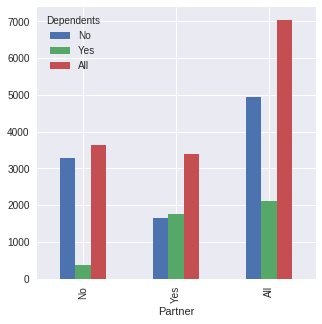

In [0]:
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5));

print('Percent of Partner that had Dependents {0}'.format((1749/2110)*100))
print('Percent of Non-Partner that had Dependents {0}'.format((361/2110)*100))

**Show the graph of the partner who has left/not left**

In [0]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


<Figure size 1224x576 with 0 Axes>

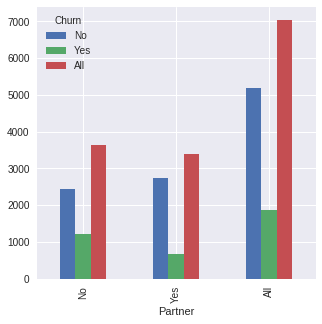

<Figure size 1224x576 with 0 Axes>

In [0]:
pd.crosstab(df.Partner,df.Churn,margins=True).plot(kind='bar',figsize=(5,5));
plt.figure(figsize=(17,8))

**Show the graph between tenure and the partner**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


<Figure size 1224x576 with 0 Axes>

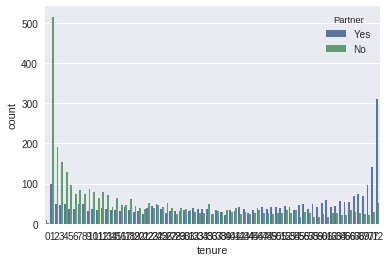

<Figure size 1224x576 with 0 Axes>

In [0]:
sns.countplot(x=df['tenure'],hue=df.Partner);
plt.figure(figsize=(17,8))

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


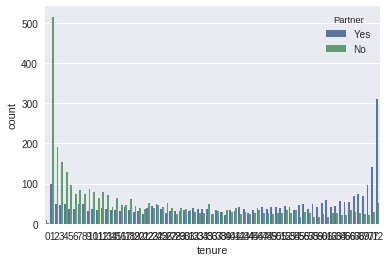

In [0]:
sns.countplot(x=df['tenure'],hue=df.Partner);
print(pd.crosstab(df.SeniorCitizen,df.Churn,margins=True))

**Show the graph how in Senior citizen churn is happening**

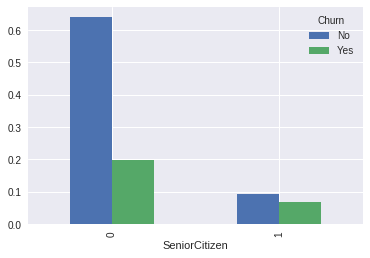

In [0]:
pd.crosstab(df.SeniorCitizen,df.Churn,normalize=True).plot(kind='bar');

**Using boxplot show the relationship between different columns**

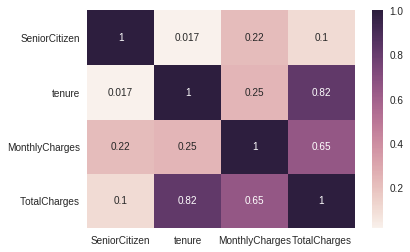

In [0]:
df.boxplot('MonthlyCharges');
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True);

**Categorize tenure into different group**

In [0]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
    
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

**Categorize Senior citizen  as 0 and 1 **

In [0]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

**Import Label Encouter for converting the value between 0 and  nlcasses-1 and import StandarScaler to remove the mean and scalling to standard variant**

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Except Customer and Churn columns ,categorize the column into categoryy columns, numerical columns and binary columns**

In [0]:
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [0]:
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
df = pd.get_dummies(data = df,columns = multi_cols )

In [0]:
telcom = df
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols, index = telcom.index)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Import the packages needed for creating different modes and check the metrics**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

**Split the data into training and test**

In [0]:
target_col = telcom["Churn"]

train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)

cols    = [i for i in telcom.columns if i not in  target_col]

X_train = train[cols]
y_train = train["Churn"]
X_test  = test[cols]
y_test  = test["Churn"]

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn import tree , linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import datasets, model_selection, metrics , preprocessing
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import time
import io, os, sys, types, time, datetime, math, random

**Create a function to  plot the ROC curve**

In [0]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

**Create a common function to predict the model and check for accuracy**

In [0]:
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [0]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

**Using Dummy classifere check the normal accuracy of model**

In [0]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)  
accuracy

0.7535491198182851

In [0]:
preds = clf.predict(X_test)
start_time = time.time()
train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent',random_state=0), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
dummy_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))
print (metrics.classification_report(y_train, train_pred_dummy))
print (metrics.classification_report(y_test, test_pred_dummy))

Accuracy: 75.35
Accuracy CV 10-Fold: 72.83
Running Time: 0:00:01.592902
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      3847
           1       0.00      0.00      0.00      1435

   micro avg       0.73      0.73      0.73      5282
   macro avg       0.36      0.50      0.42      5282
weighted avg       0.53      0.73      0.61      5282

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1327
           1       0.00      0.00      0.00       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.38      0.50      0.43      1761
weighted avg       0.57      0.75      0.65      1761



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
target_col = ["Churn"]

train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
cols    = [i for i in telcom.columns if i not in  target_col]
X_train = train[cols]
y_train = train["Churn"]
X_test  = test[cols]
y_test  = test["Churn"]

**Use logical regression to predict the model**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any e

RandomizedSearchCV took 59.87 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.799 (std: 0.004)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1.3301860569649193e+19, 'class_weight': None, 'C': 0.3483005782045175}

Model with rank: 2
Mean validation score: 0.797 (std: 0.005)
Parameters: {'penalty': 'l1', 'intercept_scaling': 1.6920875977148274e-16, 'class_weight': None, 'C': 94362074.43402536}

Model with rank: 2
Mean validation score: 0.797 (std: 0.005)
Parameters: {'penalty': 'l1', 'intercept_scaling': 419.04650827064955, 'class_weight': None, 'C': 4011070783260.9287}

Model with rank: 4
Mean validation score: 0.746 (std: 0.001)
Parameters: {'penalty': 'l2', 'intercept_scaling': 4311848.233512988, 'class_weight': 'balanced', 'C': 2.7538735473473475e+19}

Model with rank: 5
Mean validation score: 0.746 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 2.2596199661740766, 'class_weight': 'balanced', 'C': 1.8027088572578834e+19}

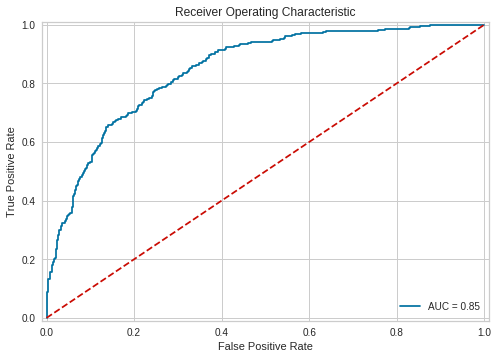

In [0]:
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

print (metrics.classification_report(y_train, train_pred_log))

print (metrics.classification_report(y_test, test_pred_log))

plot_roc_curve(y_test, probs_log)

**Using KNN, predict the model**

Accuracy: 74.56
Accuracy CV 10-Fold: 74.93
Running Time: 0:00:01.055778
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      3847
           1       0.55      0.46      0.50      1435

   micro avg       0.75      0.75      0.75      5282
   macro avg       0.68      0.66      0.67      5282
weighted avg       0.74      0.75      0.74      5282

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1327
           1       0.48      0.46      0.47       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.74      0.75      0.74      1761



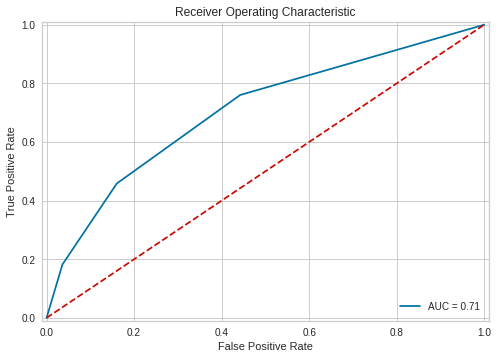

In [0]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

print (metrics.classification_report(y_train, train_pred_knn))

print (metrics.classification_report(y_test, test_pred_knn))

plot_roc_curve(y_test, probs_knn)

**Using  Gaussian Naive Bayes predict the model**

Accuracy: 73.65
Accuracy CV 10-Fold: 74.67
Running Time: 0:00:00.101562
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      3847
           1       0.52      0.78      0.63      1435

   micro avg       0.75      0.75      0.75      5282
   macro avg       0.71      0.76      0.72      5282
weighted avg       0.80      0.75      0.76      5282

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1327
           1       0.48      0.81      0.60       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.70      0.76      0.70      1761
weighted avg       0.81      0.74      0.75      1761



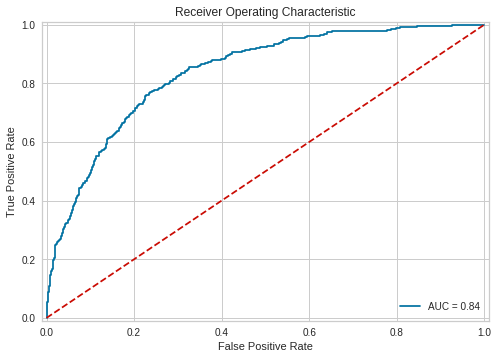

In [0]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

print (metrics.classification_report(y_train, train_pred_gaussian)) 

print (metrics.classification_report(y_test, test_pred_gaussian)) 

plot_roc_curve(y_test, probs_gau)

**Using Decision Tree predict the model**

Accuracy: 74.28
Accuracy CV 10-Fold: 71.73
Running Time: 0:00:00.337119
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3847
           1       0.48      0.49      0.49      1435

   micro avg       0.72      0.72      0.72      5282
   macro avg       0.64      0.65      0.65      5282
weighted avg       0.72      0.72      0.72      5282

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1327
           1       0.48      0.53      0.50       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.66      0.67      0.67      1761
weighted avg       0.75      0.74      0.75      1761



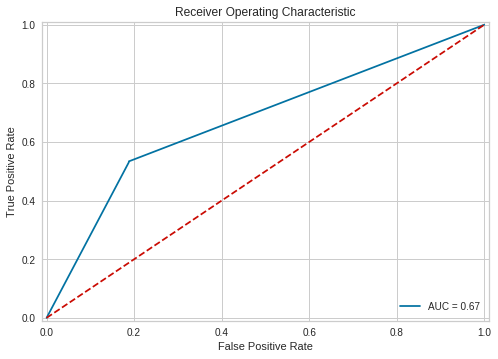

In [0]:
# Decision tree
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

print (metrics.classification_report(y_train, train_pred_dt))

print (metrics.classification_report(y_test, test_pred_dt))

plot_roc_curve(y_test, probs_dt)

**Using Random forest classifier predict the model**

In [0]:
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV took 1.05 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.799 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 9, 'min_samples_split': 8}

Model with rank: 2
Mean validation score: 0.797 (std: 0.005)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 6, 'min_samples_split': 14}

Model with rank: 3
Mean validation score: 0.793 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.793 (std: 0.001)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 6, 'min_samples_split': 5}

Model with rank: 5
Mean validation score: 0.792 (std: 0.007)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_d

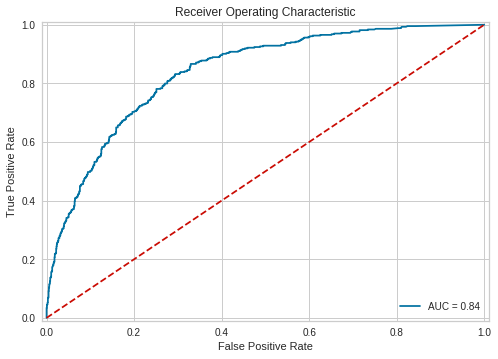

In [0]:
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

print (metrics.classification_report(y_train, train_pred_rf)) 

print (metrics.classification_report(y_test, test_pred_rf))

plot_roc_curve(y_test, probs_rf)

**Using Gradient Boosting predict the model**

Accuracy: 80.58
Accuracy CV 10-Fold: 80.16
Running Time: 0:00:04.686486
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.53      0.59      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.79      0.80      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1327
           1       0.62      0.55      0.58       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



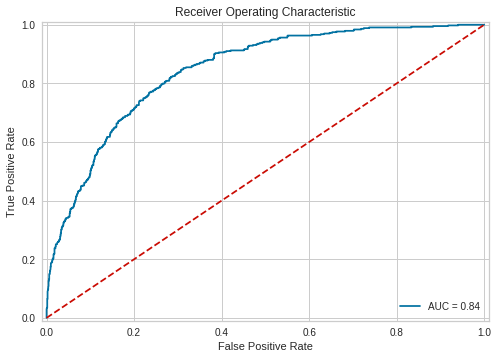

In [0]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

print (metrics.classification_report(y_train, train_pred_gbt)) 

print (metrics.classification_report(y_test, test_pred_gbt))

plot_roc_curve(y_test, probs_gbt)

**Using XG boost predict the alogirthm**

[0]	validation_0-error:0.228512	validation_1-error:0.244179	validation_0-f1:0.615483	validation_1-f1:0.566532
Multiple eval metrics have been passed: 'validation_1-f1' will be used for early stopping.

Will train until validation_1-f1 hasn't improved in 20 rounds.
[1]	validation_0-error:0.214123	validation_1-error:0.229415	validation_0-f1:0.635983	validation_1-f1:0.588595
[2]	validation_0-error:0.214502	validation_1-error:0.229983	validation_0-f1:0.636743	validation_1-f1:0.588832
[3]	validation_0-error:0.211662	validation_1-error:0.222033	validation_0-f1:0.633202	validation_1-f1:0.598974
[4]	validation_0-error:0.214502	validation_1-error:0.229415	validation_0-f1:0.640203	validation_1-f1:0.602362
[5]	validation_0-error:0.213177	validation_1-error:0.226576	validation_0-f1:0.638407	validation_1-f1:0.600601
[6]	validation_0-error:0.214881	validation_1-error:0.228279	validation_0-f1:0.639339	validation_1-f1:0.60198
[7]	validation_0-error:0.209769	validation_1-error:0.22544	validation_0-f1:0

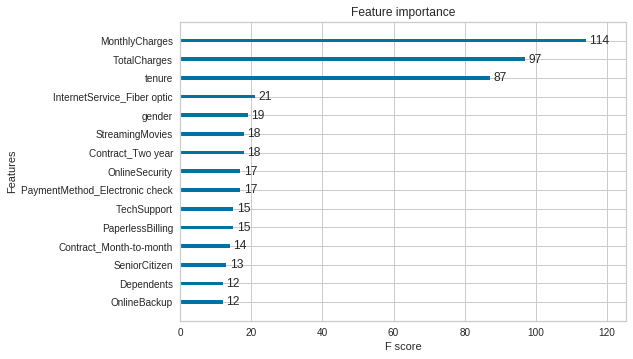

In [0]:
def xgb_f1(y, t):
    #
    # Function to evaluate the prediction based on F1 score, this will be used as evaluation metric when training xgboost model
    # Args:
    #   y: label
    #   t: predicted
    #
    # Return:
    #   f1: F1 score of the actual and predicted
    #
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]   # change the prob to class output
    return 'f1', f1_score(t, y_bin)
best_xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.7,
                         colsample_bytree = 0.8,
                         gamma = 1,
                         learning_rate = 0.15,
                         max_delta_step = 3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 50,
                         reg_lambda = 10,
                         scale_pos_weight = 1.5,
                         subsample = 0.9,
                         silent = False,
                         n_jobs = 4
                        )

xgbst = best_xgb.fit(X_train, y_train, eval_metric = xgb_f1, eval_set = [(X_train, y_train), (X_test, y_test)], 
             early_stopping_rounds = 20)
train_pred_xgbst, test_pred_xgbst, acc_xgbst, acc_cv_xgbst, probs_xgbst = fit_ml_algo(xgbst, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_xgbst)
print("Accuracy CV 10-Fold: %s" %acc_cv_xgbst)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

print (metrics.classification_report(y_train, train_pred_xgbst)) 

print (metrics.classification_report(y_test, test_pred_xgbst))



import xgboost as xgb
xgb.plot_importance(best_xgb, max_num_features = 15)
plt.show();

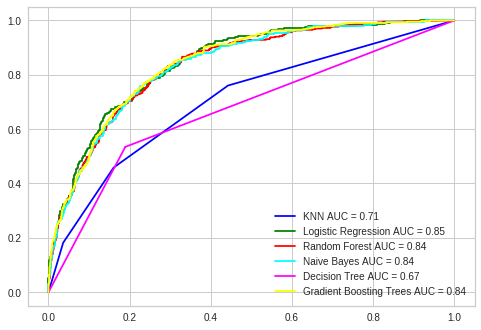

In [0]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
               
              'Decision Tree', 
              'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_dt,
        acc_gbt,
        
    ]})
models.sort_values(by='Score', ascending=False)
models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees',
    
]

probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black',
]
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()
